EJERCICIO K VECINOS MAS CERCANOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv('vehiculos.csv')

In [6]:
dataframe

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,saab
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,saab


In [7]:
dataframe['vehicle_class'].unique() #Muestra los valores que muestra la columna

array(['van', 'saab', 'bus', 'opel'], dtype=object)

DIVISION DE DATOS DE ENTRENAMIENTO Y DATOS DE PRUEBA

In [8]:
y = dataframe['vehicle_class']
X= dataframe.drop('vehicle_class', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45)

ENTRENAMIENTO DEL MODELO

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #Parametros es el numero de vecinos

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
predicciones = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test, predicciones))

[[68  2  5  2]
 [ 8 29 23  5]
 [11 19 22  5]
 [ 1  0  0 54]]


In [35]:
print(classification_report(y_test,predicciones))

precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254



In [36]:
knn.score(X_test, y_test)

0.6811023622047244

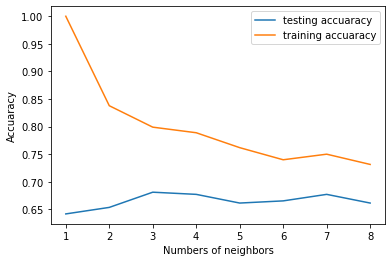

In [29]:
import matplotlib.pyplot as plt

neighbors = np.arange(1,9) #Creacion de array
train_accuaracy = np.empty(len(neighbors))
test_accuaracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    #Accuaracy training
    train_accuaracy[i] = knn.score(X_train, y_train)
    #Accuaracy testing
    test_accuaracy[i] = knn.score(X_test, y_test)
#Plot
plt.plot(neighbors, test_accuaracy, label = 'testing accuaracy')
plt.plot(neighbors, train_accuaracy, label = 'training accuaracy')
plt.legend()
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuaracy')
plt.show()